# Dependecies

In [ ]:
import os
import datetime as dt

!python --version

Python 3.7.12


In [ ]:
import joblib
from joblib import load
import numpy as np
import pandas as pd

print("numpy==%s" %np.__version__)
print("pandas==%s" %pd.__version__)
print("joblib==%s" %joblib.__version__)

numpy==1.19.5
pandas==1.2.5
joblib==1.1.0


# Load a trained model

In [ ]:
name = "model.joblib"
model_path = os.path.join(".", "models", name)
reg = load(model_path)
reg

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=0),
             param_grid={'learning_rate': [0.1, 0.03, 0.003],
                         'max_depth': [-1, 3, 5],
                         'n_estimators': [50, 100, 200, 500],
                         'num_leaves': [7, 14, 21, 28, 31, 50]},
             scoring='r2')

# Import dataset

In [ ]:
pretesting_path = os.path.join(".", "processed", "test.csv")
print("Read the pretesting dataset from %s" %(pretesting_path))

Read the pretesting dataset from ./processed/test.csv


In [ ]:
pretesting_set = pd.read_csv(pretesting_path)
pretesting_set

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],metal_linker,organic_linker1,organic_linker2,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],...,bcu,etb,fof,nbo,pcu,pts,rht,sra,tbo,the
0,-0.676648,-0.651973,-1.518383,-1.616025,-1.191212,-0.686227,-0.646631,0.517222,0.967949,1.398798,...,-0.22669,-0.219765,-0.123032,-0.147367,0.699156,-0.048779,-0.00657,-0.370973,-0.019712,-0.023693
1,0.510338,1.908794,-1.189668,-0.600072,-0.983700,-0.048630,-0.553993,-0.367257,-0.315892,-0.860195,...,-0.22669,-0.219765,-0.123032,-0.147367,-1.430295,-0.048779,-0.00657,-0.370973,-0.019712,-0.023693
2,-0.516445,-0.696018,1.657145,0.674681,0.616254,-0.367429,-0.090806,-0.367257,-0.690711,-0.948818,...,-0.22669,-0.219765,-0.123032,-0.147367,0.699156,-0.048779,-0.00657,-0.370973,-0.019712,-0.023693
3,-0.177007,-0.479194,2.108731,1.344955,1.476642,-0.686227,-1.017180,0.713773,-0.934242,-0.875957,...,-0.22669,-0.219765,-0.123032,-0.147367,0.699156,-0.048779,-0.00657,-0.370973,-0.019712,-0.023693
4,0.102354,-0.181128,1.067237,1.191671,1.214408,-0.367429,-0.368718,-0.170706,-0.696895,-0.658708,...,-0.22669,-0.219765,-0.123032,-0.147367,0.699156,-0.048779,-0.00657,-0.370973,-0.019712,-0.023693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,12.117181,2.772305,4.826764,5.128679,15.755946,-0.367429,-0.831905,-0.662083,-1.290539,-3.222734,...,-0.22669,-0.219765,-0.123032,6.785772,-1.430295,-0.048779,-0.00657,-0.370973,-0.019712,-0.023693
16996,0.894561,-0.040184,2.722023,3.252400,4.778951,-0.367429,-1.017180,-0.956910,-1.135142,-2.609347,...,-0.22669,-0.219765,-0.123032,6.785772,-1.430295,-0.048779,-0.00657,-0.370973,-0.019712,-0.023693
16997,0.731370,-0.194638,3.057574,2.820353,4.579025,-0.686227,-0.461356,0.222396,-1.281423,-2.688173,...,-0.22669,-0.219765,-0.123032,-0.147367,0.699156,-0.048779,-0.00657,-0.370973,-0.019712,-0.023693
16998,0.736380,-0.289305,3.110845,3.400184,5.880443,-0.367429,-0.461356,0.418947,-1.270371,-2.854109,...,-0.22669,-0.219765,-0.123032,-0.147367,0.699156,-0.048779,-0.00657,-0.370973,-0.019712,-0.023693


# Matrix representation

In [ ]:
TARGET = 'CO2_working_capacity [mL/g]'
FEATURES = list(pretesting_set.columns)
FEATURES, TARGET

(['volume [A^3]',
  'weight [u]',
  'surface_area [m^2/g]',
  'void_fraction',
  'void_volume [cm^3/g]',
  'metal_linker',
  'organic_linker1',
  'organic_linker2',
  'CO2/N2_selectivity',
  'heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]',
  'density [g/cm^3]',
  'acs',
  'bcu',
  'etb',
  'fof',
  'nbo',
  'pcu',
  'pts',
  'rht',
  'sra',
  'tbo',
  'the'],
 'CO2_working_capacity [mL/g]')

In [ ]:
T = pretesting_set[FEATURES].values
T.shape

(17000, 22)

# Inference

In [ ]:
y_pred = reg.predict(T)
y_pred.shape, y_pred

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# Make submission zip file

In [ ]:
pretesting_set['id'] =[ "pretest_"+str(i+1) for i in range(y_pred.shape[0])]
pretesting_set[TARGET] = y_pred
pretesting_set[["id", TARGET]]

,id,CO2_working_capacity [mL/g]
0,pretest_1,82.673242
1,pretest_2,139.469055
2,pretest_3,192.383109
3,pretest_4,61.436080
4,pretest_5,83.328628
...,...,...
1995,pretest_1996,2.491475
1996,pretest_1997,11.506122
1997,pretest_1998,-0.330516
1998,pretest_1999,-4.463965


<AxesSubplot:ylabel='Density'>

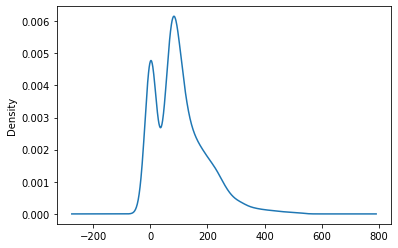

In [ ]:

pretesting_set[TARGET].plot.density()

In [ ]:
date_submission = str(dt.datetime.now().date()).replace("-", "")
time_submission = str(dt.datetime.now().time()).split(".")[0].replace(":","")
(date_submission, time_submission)

submission_path = os.path.join(".", "submission", f'submission_{date_submission}_{time_submission}.zip')
compression_opts = dict(method='zip', archive_name='submission.csv')
pretesting_set[["id", TARGET]].to_csv(submission_path, index=False,compression=compression_opts)  

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d59402b5-3ee5-4c9e-aee0-4349ccd0c385' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>